<a href="https://colab.research.google.com/github/mirsaidl/C_plusplus/blob/main/threshold_erosion_edgedetection_diletion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

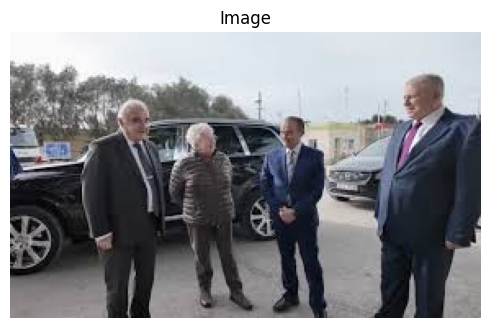

In [4]:
image = cv2.imread('/content/images - 2024-03-25T235706.664.jpg')
imshow('Image', image)

# Thresholding

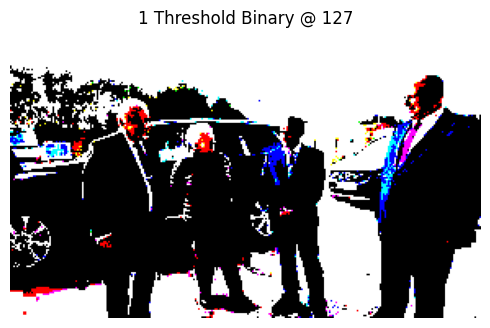

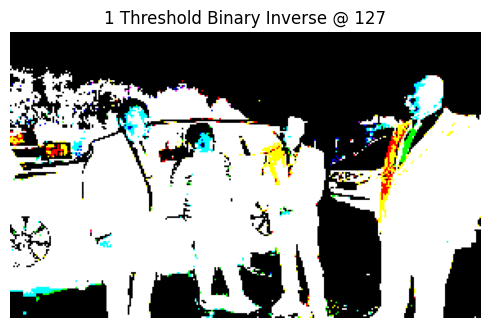

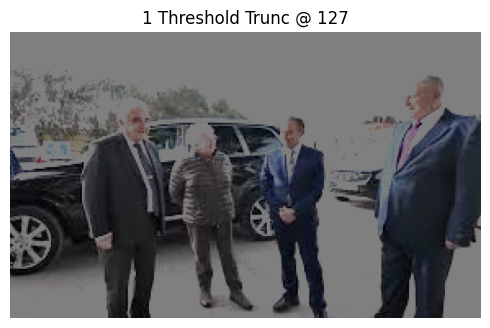

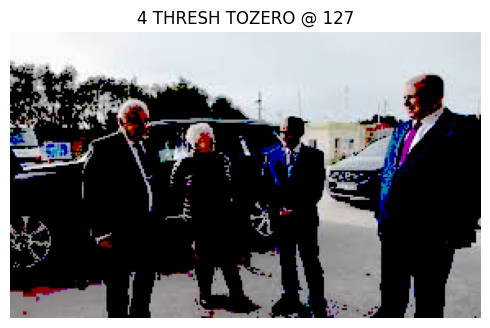

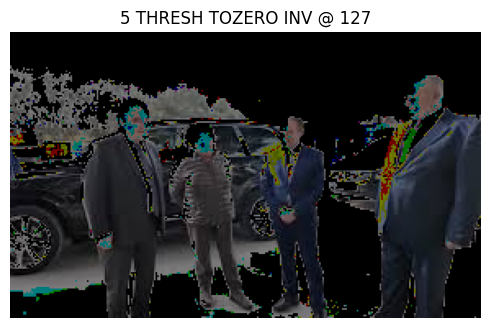

In [7]:
ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

ret, thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('1 Threshold Binary Inverse @ 127', thresh2)

ret, thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('1 Threshold Trunc @ 127', thresh3)

ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

# Dilation, Erosion and Edge Detection

- **Dilation** – Adds pixels to the boundaries of objects in an image
- **Erosion** – Removes pixels at the boundaries of objects in an image
- **Opening** - Erosion followed by dilation
- **Closing** - Dilation followed by erosion

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.19.08%20pm.png)

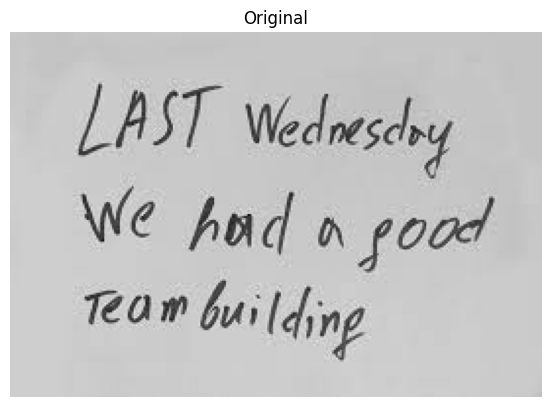

In [16]:
image = cv2.imread('/content/images.jpg', 0)
imshow('Original', image)

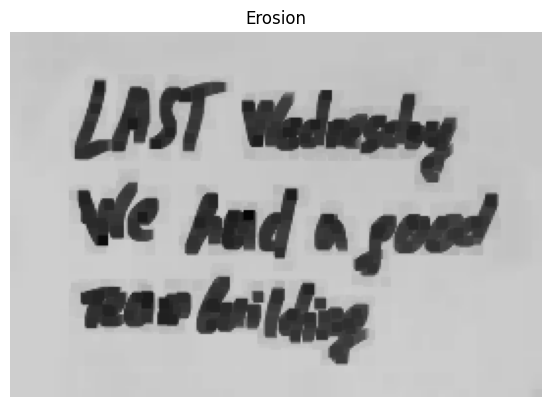

In [19]:
# Define kernel
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(image, kernel, iterations = 1)
imshow('Erosion', erosion)

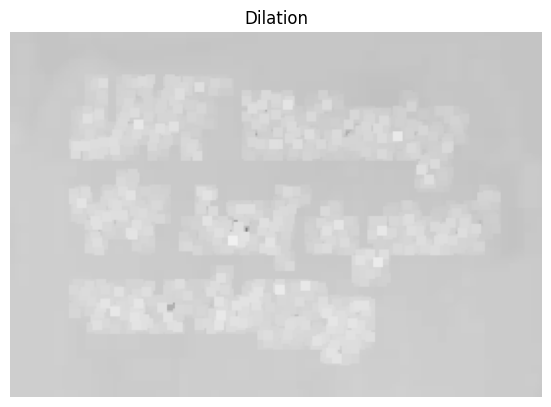

In [20]:
# Dilate here
dilation = cv2.dilate(image, kernel, iterations = 1)
imshow('Dilation', dilation)

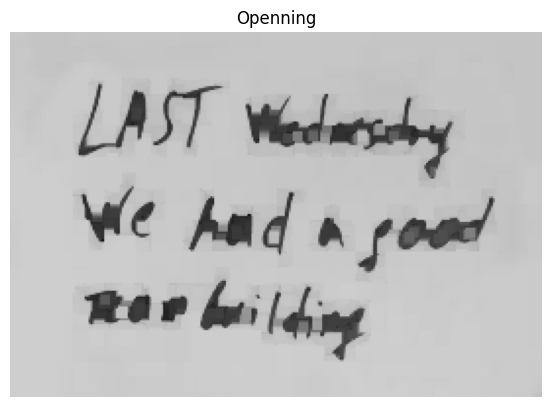

In [21]:
# Openning - Good for removing noise
open = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
imshow('Openning', open)

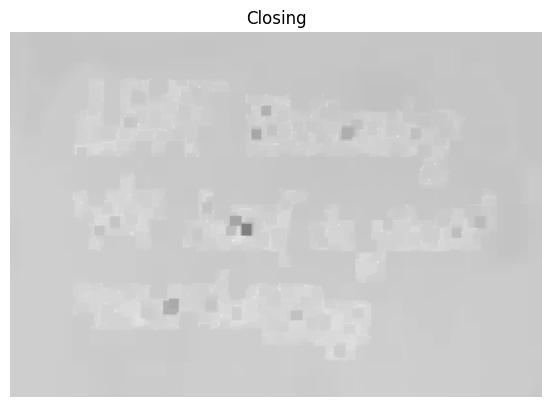

In [22]:
# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

## **Canny Edge Detection**
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively.
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.

Edge detection needs a threshold to tell what difference/change should be counted as edge

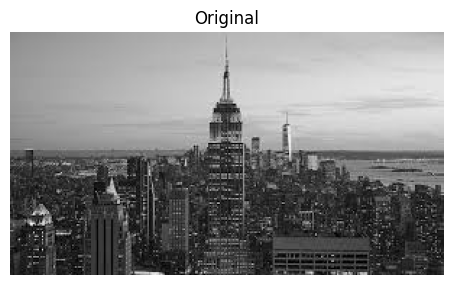

In [25]:
image = cv2.imread('/content/download (1).jpg', 0)
imshow('Original', image)

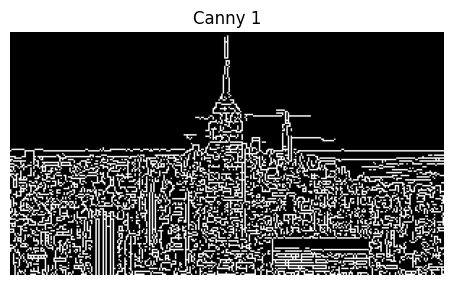

In [29]:
canny = cv2.Canny(image, 50, 120)
imshow('Canny 1', canny)

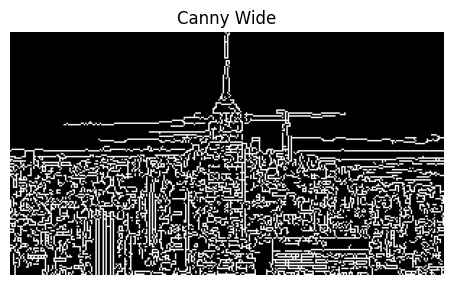

In [30]:
# Expect a lot of edges
canny = cv2.Canny(image, 10, 200)
imshow('Canny Wide', canny)

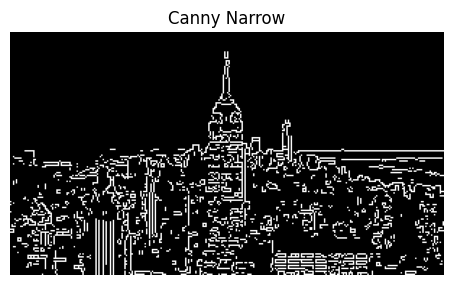

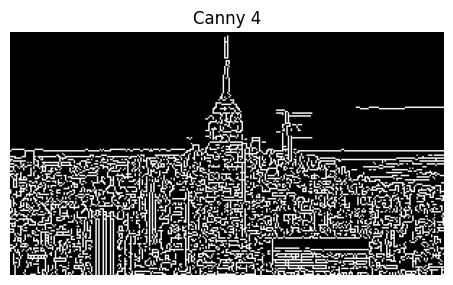

In [31]:
# Narrow threshold, expect less edges
canny = cv2.Canny(image, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image, 60, 110)
imshow('Canny 4', canny)

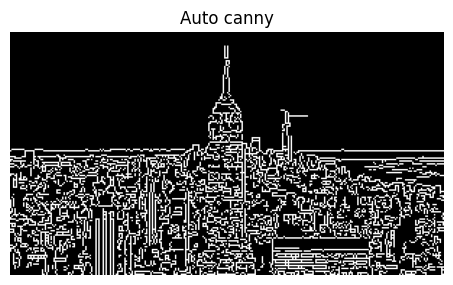

In [32]:
# Auto Canny
def autoCanny(image):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image, ksize=(5,5))
  med_val = np.median(image)
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image, threshold1=lower, threshold2=upper)
  return edges

imshow('Auto canny', autoCanny(image))